In [1]:
# autoreload libraries
%load_ext autoreload
%autoreload 2

import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import folium
from folium.map import Element
import seaborn as sns
from IPython.display import Markdown as md
from IPython.display import display, HTML

import xyzservices.providers as xyz

from nycschools import schools, geo, ui, snapshot as snap
from nycschools.dataloader import load
from nycschools import config

import warnings
warnings.filterwarnings('ignore')

In [32]:
# snap.clean_snapshot()
# df = load(config.urls["building_footprints"].city_footprints_feather)
# df
geo.get_school_footprints()

Getting footprints from URL


,name,base_bbl,shape_area,heightroof,mpluto_bbl,cnstrct_yr,globalid,lststatype,feat_code,groundelev,geomsource,bin,lstmoddate,doitt_id,shape_len,geometry,bbl,dbn
0,None,2045520010,None,11.28,2045520010,1931,{188CE2E2-F27E-4117-B490-E208B123669E},Constructed,2100,135,Photogramm,2111187,2017-08-22,951263,None,POINT (-73.86112 40.86848),2045520010,11X076
1,None,2029390045,None,86.30603719,2029390045,1921,{B6CC3217-0021-4744-A99A-4C71674ABE3B},Constructed,2100,93,Photogramm,2009865,2017-08-22,484278,None,POINT (-73.89288 40.83634),2029390045,12X061
2,None,2029390045,None,86.30603719,2029390045,1921,{B6CC3217-0021-4744-A99A-4C71674ABE3B},Constructed,2100,93,Photogramm,2009865,2017-08-22,484278,None,POINT (-73.89288 40.83634),2029390045,12X190
3,Roosevelt Isld Subway Station,1013730001,None,28.47,1013730001,1975,{E49130B9-6088-4BB5-9BA5-ABA8BFC69BA7},Constructed,2100,16,Photogramm,1089270,2008-03-25,996736,None,POINT (-73.95334 40.75912),1013730001,02M217
4,None,1005770019,None,83.52,1005770019,1930,{A1F1F3B7-CA18-4440-B2AE-B27E3D503B12},Constructed,2100,30,Photogramm,1009713,2017-08-22,703933,None,POINT (-73.99574 40.73642),1005770019,02M534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3434,None,4074100001,0.0,49.31,4074100001,1936,{FA1C20F9-492A-4B10-8695-2120B50515FA},Constructed,2100,55,Photogramm,4159363,2017-08-22,744587,0.0,"MULTIPOLYGON (((-73.77649 40.74895, -73.77637 ...",4074100001,26Q162
3435,None,5036450007,0.0,51.32562877,5036450007,1931,{4D5607A6-0AC1-46A5-8EB4-828512EB26F1},Constructed,2100,19,Photogramm,5052791,2017-08-22,172987,0.0,"MULTIPOLYGON (((-74.10892 40.57415, -74.10850 ...",5036450007,31R041
3436,None,4155640063,0.0,14.64799173,4155640063,1931,{5E833E06-ACB6-4F0B-BE46-B2108843D8D4},Constructed,2100,28,Photogramm,4586871,2014-02-10,375884,0.0,"MULTIPOLYGON (((-73.75303 40.60132, -73.75310 ...",4155640063,84Q170
3437,None,3083880002,0.0,44.38,3083880002,1963,{16BC1791-15BE-4FA6-8A99-5C9047168BDF},Constructed,2100,8,Photogramm,3236496,2017-08-22,333411,0.0,"MULTIPOLYGON (((-73.91318 40.62126, -73.91243 ...",3083880002,84K781


In [30]:
feet = geo.load_school_footprints()
locations = geo.load_school_locations()
all_feet = geo.load_city_footprints()
snapshots = snap.load_snapshots()

TypeError: Input must be valid geometry objects: b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x00\x03\x18\xf2\x85\xdd}R\xc0\xa0=\x83\xa9 PD@\xe2\xdd^\xd8\xe0}R\xc0\xb9\xa4\xc9\x07 PD@\x01\x082\x06\xe1}R\xc0\xa8\xf2T7"PD@y\xdd<\n\xdd}R\xc0\x90&N\xf9"PD@\x06\x1e\x05\xe1\xdc}R\xc0\xc4\x9c\x0c\x02!PD@\xc6\x86\x8e\x8a\xdd}R\xc0b\xfd\xce\xe1 PD@\x03\x18\xf2\x85\xdd}R\xc0\xa0=\x83\xa9 PD@'

In [24]:
display(feet.columns)
colo = snapshots[snapshots.colocated == True]
buildings = pd.merge(feet, colo, on='dbn', how='inner')
buildings[["dbn", "school_name", "name", "base_bbl", "bbl", "globalid", "doitt_id"]]

Index(['name', 'base_bbl', 'shape_area', 'heightroof', 'mpluto_bbl',
       'cnstrct_yr', 'globalid', 'lststatype', 'feat_code', 'groundelev',
       'geomsource', 'bin', 'lstmoddate', 'doitt_id', 'shape_len', 'bbl',
       'dbn', 'geometry'],
      dtype='object')

,dbn,school_name,name,base_bbl,bbl,globalid,doitt_id
0,12X061,P.S. 061 Francisco Oller,None,2029390045,2029390045,{B6CC3217-0021-4744-A99A-4C71674ABE3B},484278
1,12X061,P.S. 061 Francisco Oller,None,2029390045,2029390045,{B6CC3217-0021-4744-A99A-4C71674ABE3B},484278
2,12X061,P.S. 061 Francisco Oller,None,2029390045,2029390045,{B6CC3217-0021-4744-A99A-4C71674ABE3B},484278
3,12X061,P.S. 061 Francisco Oller,None,2029390045,2029390045,{B6CC3217-0021-4744-A99A-4C71674ABE3B},484278
4,12X061,P.S. 061 Francisco Oller,None,2029390045,2029390045,{B6CC3217-0021-4744-A99A-4C71674ABE3B},484278
...,...,...,...,...,...,...,...
5384,28Q040,P.S. 040 Samuel Huntington,None,4121510001,4121510001,{DC1CA3D9-0637-4823-AE05-FDADBFEE1AD0},202826
5385,28Q040,P.S. 040 Samuel Huntington,None,4121510001,4121510001,{DC1CA3D9-0637-4823-AE05-FDADBFEE1AD0},202826
5386,28Q040,P.S. 040 Samuel Huntington,None,4121510001,4121510001,{DC1CA3D9-0637-4823-AE05-FDADBFEE1AD0},202826
5387,28Q040,P.S. 040 Samuel Huntington,None,4121510001,4121510001,{DC1CA3D9-0637-4823-AE05-FDADBFEE1AD0},202826


AttributeError: The CRS attribute of a GeoDataFrame without an active geometry column is not defined. Use GeoDataFrame.set_geometry to set the active geometry column.

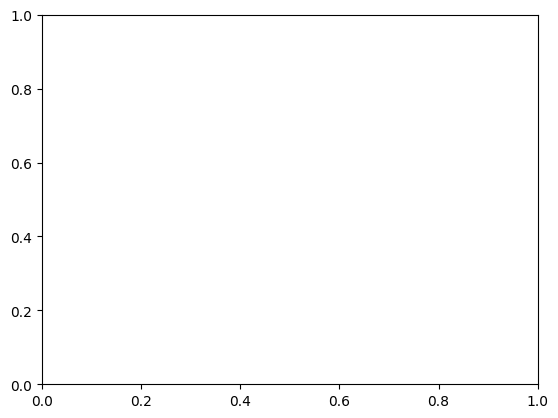

In [29]:

missing = colo[colo.dbn.isin(feet.dbn) == False]
# gpd.sjoin(all_feet, missing, how="inner", op="contains")
all_feet.plot()

In [16]:
gpd.read_file("foo.gpkg")

,dbn,school_name,school_type,address,all_es_admissionsmethods,all_ms_admissionsmethods,attendance_rate,authorizer_website,ay,champs_sports_boys,...,website_ms,lat,long,x,y,colocated,colocated_schools,colocated_n,district,geometry
0,01M134,P.S. 134 Henrietta Szold,None,293 East Broadway,Choice,None,0.97,None,2016,None,...,None,40.714248,-73.983854,988726,199497,False,,0,1,POINT (-73.98385 40.71425)
1,02M150,P.S. 150,None,334 Greenwich Street,Non-Zoned,None,0.97,None,2016,None,...,None,40.719530,-74.010880,981234,201421,False,,0,2,POINT (-74.01088 40.71953)
2,02M151,Yorkville Community School,None,421 East 88 Street,Zoned,None,0.97,None,2016,None,...,None,40.777948,-73.947287,998849,222709,False,,0,2,POINT (-73.94729 40.77795)
3,01M315,The East Village Community School,None,610 East 12 Street,Choice,None,0.96,None,2016,None,...,None,40.727537,-73.978254,990277,204339,True,,0,1,POINT (-73.97825 40.72754)
4,01M361,The Children's Workshop School,None,610 East 12 Street,Choice,None,0.95,None,2016,None,...,None,40.727537,-73.978254,990277,204339,True,,0,1,POINT (-73.97825 40.72754)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7719,84M382,DREAM Charter School,K-8,1991 Second Avenue,None,None,0.90,http://www.newyorkcharters.org/,2021,Baseball; Basketball; Flag Football,...,None,40.789174,-73.945101,999452,226799,True,"04M964, 84M337",3,84,POINT (-73.94510 40.78917)
7720,84M373,Zeta Charter Schools - Inwood 1,ES,652 West 187th Street,None,None,0.00,http://www.newyorkcharters.org/,2021,None,...,None,40.853517,-73.932869,1002821,250244,True,"06M098, 06M192, 06M209",4,84,POINT (-73.93287 40.85352)
7721,84M284,Harlem Children's Zone Promise Academy 1 Chart...,K-8,245 West 129th Street,None,None,0.94,https://infohub.nyced.org/reports-and-policies...,2021,Basketball; Cheerleading; Volleyball; Flag Foo...,...,None,40.811882,-73.947317,998600,235286,False,,0,84,POINT (-73.94732 40.81188)
7722,25Q219,P.S. 219 Paul Klapper,K-8,144-39 Gravett Road,Zoned,"Open, ASD/ACES Program",0.96,None,2021,None,...,None,40.737448,-73.823841,1033068,207998,False,,0,25,POINT (-73.82384 40.73745)


In [78]:
# load all of the data and clean it up
# loc = geo.load_school_locations()
# districts = geo.load_districts()
# demos = schools.load_school_demographics()
# feet = geo.load_school_footprints()
# snapshots = snap.load_snapshots()

In [82]:
# use the co_location field in snapshots
snapshots = snapshots[snapshots.ay == snapshots.ay.max()]
snapshots.co_located = snapshots.co_located.fillna(False)
snapshots["coloc_snap"] = snapshots.co_located.apply(lambda x: False if x == 'No' or not x else True)
snapshots.columns


colocated_n
1.0       2
5637.0    1
1227.0    1
640.0     1
116.0     1
43.0      1
27.0      1
10.0      1
9.0       1
11.0      1
2.0       1
Name: count, dtype: int64

In [76]:
data = demos[demos.ay == demos.ay.max()]
# get all of the schools in NYC
a = set(data.dbn.unique())
b = set(loc.dbn.unique())
c = set(snapshots.dbn.unique())
inter = a.intersection(b).intersection(c)
all = a.union(b).union(c)
len(inter), len(all)
diff = all - inter
# demos[demos.dbn.isin(diff)][["dbn","ay","school_name"]]

# get all of a not in b
no_location = set(a) - set(b)
no_snap = set(a) - set(c)
len(no_location), len(no_snap)
no_demos = set(c) - set(a)

# these 79 schools have no snapshot data
data[data.dbn.isin(no_snap)][["dbn", "ay","school_name"]] 

snapshots[~snapshots.dbn.isin(data.dbn)][["dbn", "address", "location_name_long"]]

,dbn,address,location_name_long
2808,01M019,185 1 Avenue,P.S. 019 Asher Levy
3333,15K418,512 Carroll Street,The Children's School
4001,84K912,250 Blake Avenue,Key Collegiate Charter School


In [54]:
# find colocations based on point location
loc["point"] = loc.x.astype(str) + "," + loc.y.astype(str)
coloc = loc[["dbn", "point"]].groupby("point").count().reset_index()
coloc.columns = ["point", "coloc_n"]
coloc["coloc_point"] = coloc["coloc_n"] > 1
a = loc.merge( coloc[["point", "coloc_point"]], on="point", how="inner")
df = a.merge(snapshots[["dbn", "coloc_snap", "location_name_long", "co_located"]], on="dbn", how="inner")
df = df.merge(demos[demos.ay == demos.ay.max()][["dbn","school_name"]], on="dbn", how="inner")
cols = ['dbn', 'school_name', 'coloc_point', 'coloc_snap', 'co_located']
df[df.coloc_point != df.coloc_snap][cols]

,dbn,school_name,coloc_point,coloc_snap,co_located
2,17K091,P.S. 091 The Albany Avenue School,False,True,"Yes, colocated (75K373, 75K811)"
3,31R455,Tottenville High School,False,True,"Yes, colocated (75R025, 75R721, 79M379, 79Q950)"
11,75X811,P.S. X811,False,True,"Yes, colocated (11X418)"
15,75X186,P186X Walter J. Damrosch School,False,True,"Yes, colocated (08X146, 08X269, 10X306, 10X331..."
17,12X044,P.S. 044 David C. Farragut,False,True,"Yes, colocated (84X598)"
...,...,...,...,...,...
1869,31R445,Port Richmond High School,False,True,"Yes, colocated (75R025, 79M973, 79M984, 79Q950)"
1877,09X042,P.S. 042 Claremont,False,True,"Yes, colocated (75X469)"
1879,84X581,South Bronx Community Charter High School,True,False,No
1915,27Q223,P.S. 223 Lyndon B. Johnson,False,True,"Yes, colocated (75Q075)"


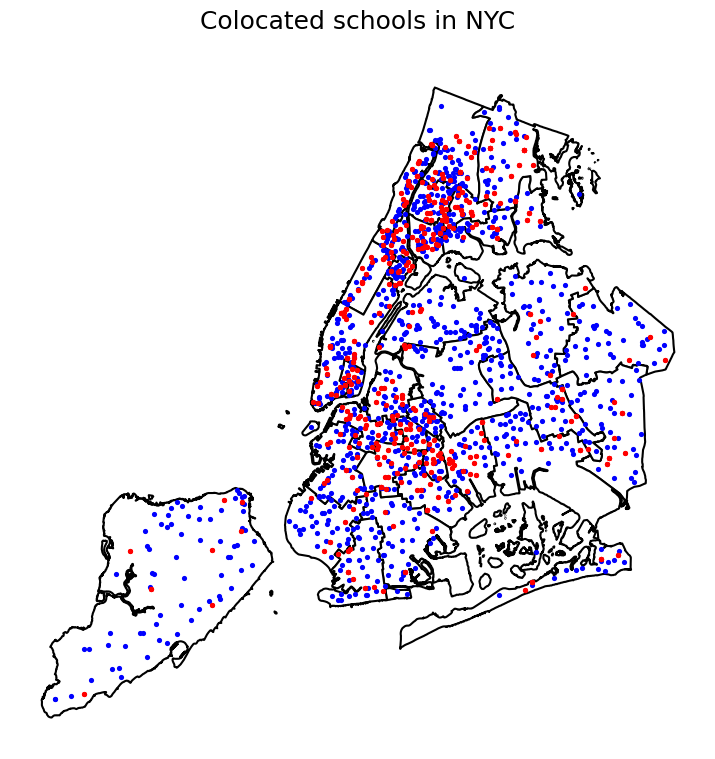

In [62]:

# plot colocated schools
loc["point"] = loc.x.astype(str) + "," + loc.y.astype(str)
coloc = loc[["dbn", "point"]].groupby("point").count().reset_index()
coloc["colocated"] = coloc["dbn"] > 1
data = loc.merge(coloc, on="point", how="inner")
data = data[['point', 'geometry', 'colocated']]

# configure the look of our map
fig, ax = plt.subplots(figsize=(16, 9))
fig.patch.set_facecolor('white')
sns.set_context('talk')
plt.axis('off')

ax.set_title( "Colocated schools in NYC", color="black", pad=20)

ax = districts.plot(ax=ax, color="white", edgecolor="black")
data[data.colocated == False].plot(ax=ax, color="blue", markersize=5)
data[data.colocated == True].plot(ax=ax, color="red", markersize=5)
plt.show()